# Overview

**`GOAL`**

---



The goal of this project is to apply EDA to property sales in NYC to extract insights into its data such as:

1. Compare mean sale prices across different boroughs
2. Identify the most common property type and tax class
3. Compare property units (total, residential, and commercial) across different boroughs in NYC
4. Identify areas with the largest property Gross Square Feet and Land Square Feet in NYC

And to examine correlations between sale price and other factors.

**`DATASET`**

---



This dataset is a record of every building or building unit (apartment, etc.) sold in New York City property market over a 12-month period.

Dataset source:  https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

# Import Libraries

In [4]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Load

In [5]:
# get data from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read data

df = pd.read_csv('/content/drive/MyDrive/Data Project/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Informations

In [7]:
# get information from data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Data Pre-Processing

In [8]:
# change data type

df['SALE DATE'] = pd.to_datetime(df['SALE DATE']) # object to date time

num_col = ['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE'] # object to numeric

for col in num_col:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# drop unused column

df.drop(['Unnamed: 0', 'NEIGHBORHOOD',
         'BLOCK', 'LOT','APARTMENT NUMBER',
         'ZIP CODE','EASE-MENT', 'YEAR BUILT',
         'SALE DATE', 'ADDRESS',
         'TAX CLASS AT TIME OF SALE',
         'BUILDING CLASS AT TIME OF SALE'
         ], axis=1, inplace=True)

In [10]:
# null values check

df = df.replace(['-',' '], np.NaN)
df.isnull().sum()

,0
BOROUGH,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,738
BUILDING CLASS AT PRESENT,738
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0
LAND SQUARE FEET,26252
GROSS SQUARE FEET,27612
SALE PRICE,14561


In [11]:
# drop null values

df.dropna(inplace=True)
df.isnull().sum()

,0
BOROUGH,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,0
BUILDING CLASS AT PRESENT,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0
LAND SQUARE FEET,0
GROSS SQUARE FEET,0
SALE PRICE,0


In [12]:
# duplicate data check

df.duplicated().sum()

7334

In [13]:
# drop duplicated data

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Replace `BOROUGH` column values with:
- 1: Manhattan
- 2: Bronx
- 3: Brooklyn
- 4: Queens
- 5: Staten Island

In [14]:
# replace values

df['BOROUGH'] = df.BOROUGH.replace({
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
})

In [15]:
# df check

df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,6625000.0
3,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,3936272.0
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,8000000.0
6,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,3192840.0
9,Manhattan,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,18523.0,16232000.0


# Explorary Data Analysis & Visualization

## Sale Price Average in NYC and Each Borough

In [16]:
# SALE PRICE mean

mean_nyc = df['SALE PRICE'].mean()

# SALE PRICE mean in each BOROUGH

mean_manhattan = df.loc[(df['BOROUGH'] == 'Manhattan')]['SALE PRICE'].mean()
mean_bronx = df.loc[(df['BOROUGH'] == 'Bronx')]['SALE PRICE'].mean()
mean_brooklyn = df.loc[(df['BOROUGH'] == 'Brooklyn')]['SALE PRICE'].mean()
mean_queens = df.loc[(df['BOROUGH'] == 'Queens')]['SALE PRICE'].mean()
mean_staten = df.loc[(df['BOROUGH'] == 'Staten Island')]['SALE PRICE'].mean()

# mean table

mean = {'Mean':[mean_nyc, mean_manhattan,
                mean_bronx, mean_brooklyn,
                mean_queens, mean_staten]}
mean = pd.DataFrame(mean, index = ['NYC', 'Manhattan', 'Bronx',
                                   'Brooklyn', 'Queens', 'Staten Island']).sort_values(by= 'Mean', ascending=False)
mean

,Mean
Manhattan,1.934353e+07
NYC,1.306286e+06
Brooklyn,1.003236e+06
Queens,9.124106e+05
Bronx,6.814771e+05
Staten Island,5.290068e+05


## Sale Price Average Visualization

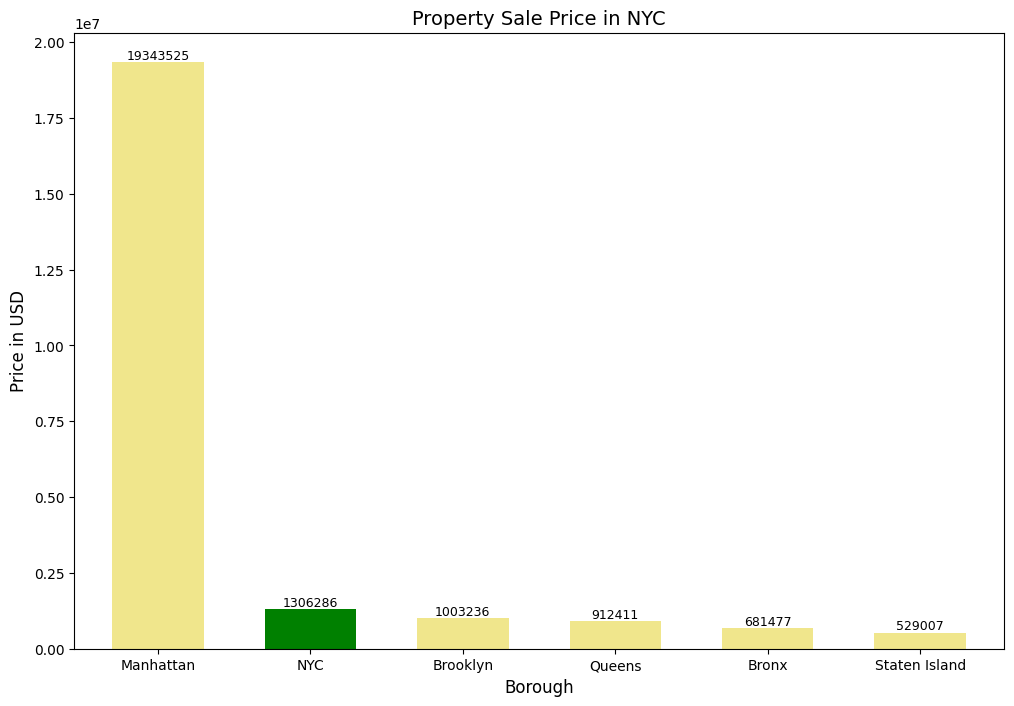

In [17]:
# visualization using bar chart

colors = ['Khaki' for _ in range (len(mean))]
colors[1] = 'Green'

ax = mean['Mean'].plot(kind='bar', figsize=(12, 8),
                       color=colors, width=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.title('Property Sale Price in NYC', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.xticks(rotation=0)

plt.show()

**INSIGHT**

---




From the bar chart above, it can be seen that the average selling price of properties in Manhattan is higher than the other boroughs at `19,343,525 USD`.

Manhattan's property selling price is `18,037,239 USD` higher than the average selling price of properties in NYC which is `1,306,286 USD`. While the lowest average selling price in NYC is in Staten Island with an average selling price of `529,007 USD`

## Most Building Class Category

In [18]:
# top 10 most building class category

most_building_category = df['BUILDING CLASS CATEGORY'].value_counts().head(10)
most_building_category

,count
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,14042
02 TWO FAMILY DWELLINGS,12549
03 THREE FAMILY DWELLINGS,3430
07 RENTALS - WALKUP APARTMENTS,2549
13 CONDOS - ELEVATOR APARTMENTS,1355
10 COOPS - ELEVATOR APARTMENTS,1090
22 STORE BUILDINGS,693
14 RENTALS - 4-10 UNIT,535
15 CONDOS - 2-10 UNIT RESIDENTIAL,489


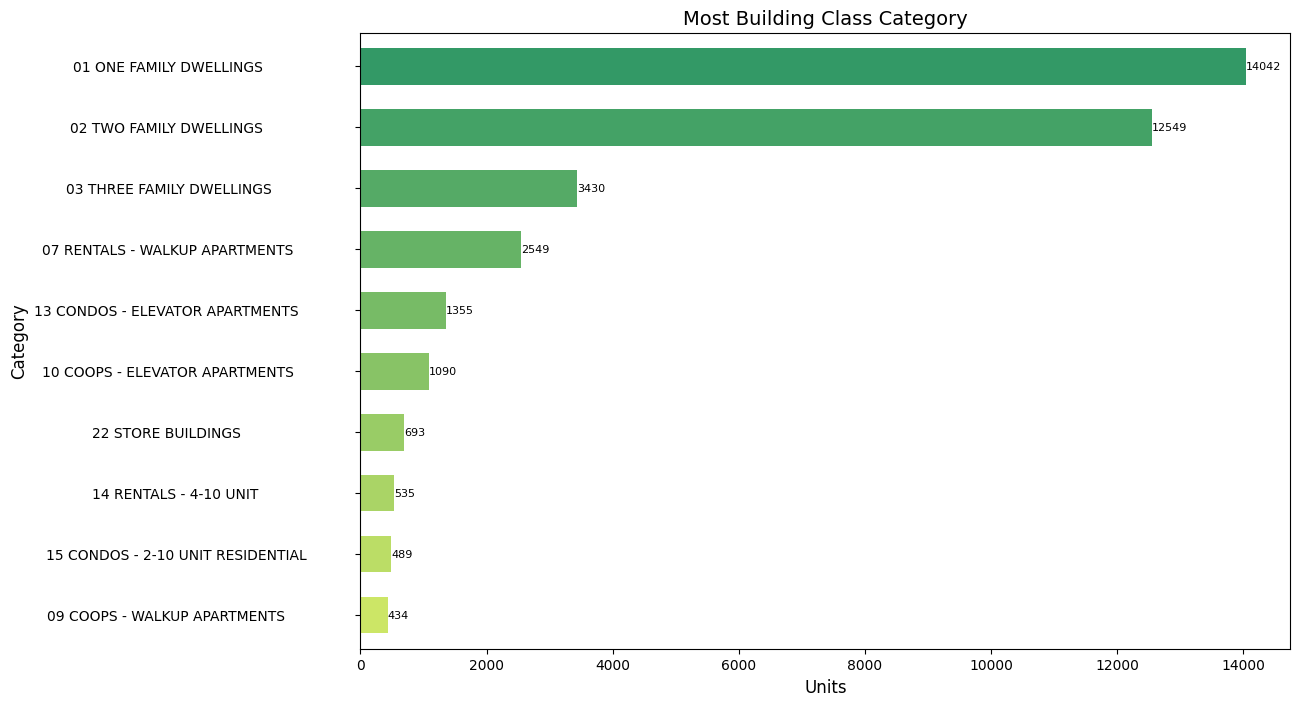

In [19]:
# visualization using barh chart

colors = plt.cm.summer(np.linspace(0.8, 0.2, len(most_building_category)))

ax = most_building_category.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8), color=colors, width=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.title('Most Building Class Category', fontsize=14)
plt.xlabel('Units', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.show()

**INSIGHT**

---



From the bar chart, it can be seen that the most common type of building in NYC is type 01, which is a type of one-family dwelling with as many as 14042 units.

The second most common position is type 02, which is two-family dwellings with as many as 12549 units, and the third most common position is building type 03, which is three-family dwellings with as many as 3430 units.


## Property Tax Class Visualization

In [20]:
# tax class value counts

tax_class = df['TAX CLASS AT PRESENT'].value_counts()
tax_class

,count
TAX CLASS AT PRESENT,
1,30106
2,3865
4,2547
2A,1922
2C,696
2B,604
1B,405
1A,307
1C,105


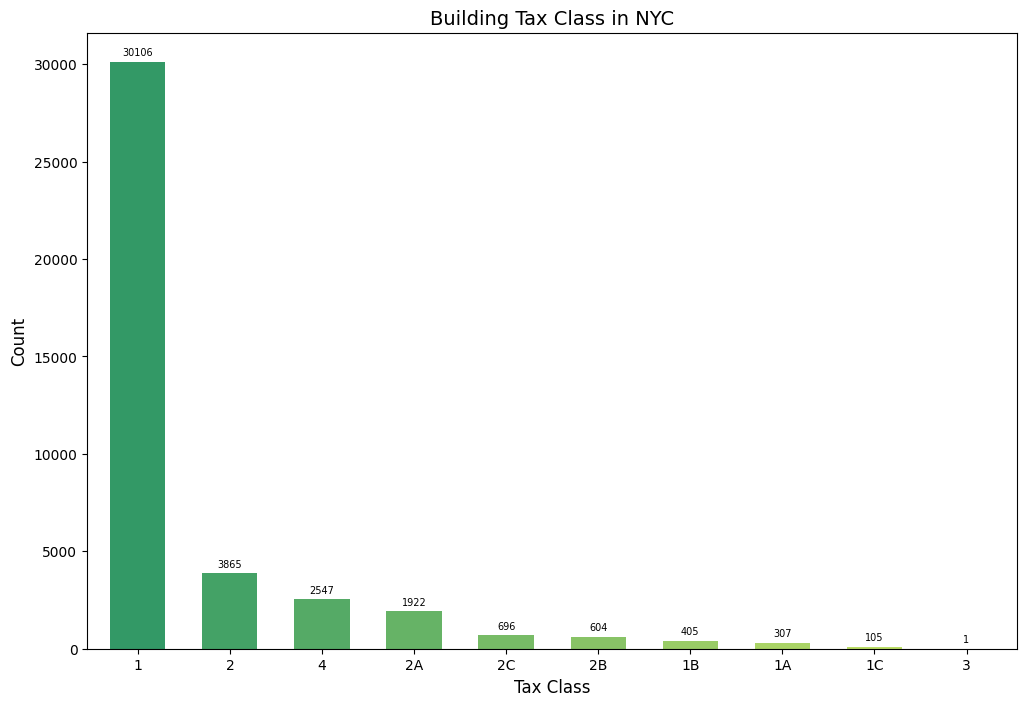

In [21]:
# tax class building visualization

colors = plt.cm.summer(np.linspace(0.2, 0.8, len(df['TAX CLASS AT PRESENT'].value_counts())))

ax = df['TAX CLASS AT PRESENT'].value_counts().plot(kind='bar', figsize=(12, 8), color=colors, width=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=7, padding=3)

plt.title('Building Tax Class in NYC', fontsize=14)
plt.xlabel('Tax Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.show()

**INSIGHT**

---



From the bar chart, it can be seen that most buildings in NYC have a tax class category of type 1. Out of 40558 building units, 30106 are buildings with a type 1 tax class category, while the remaining 10452 are buildings with other tax class categories.

## Total Property Units in NYC

In [23]:
# total units in NYC

total_unit_nyc = df['TOTAL UNITS'].sum()
total_unit_nyc_residential = df['RESIDENTIAL UNITS'].sum()
total_unit_nyc_commercial = df['COMMERCIAL UNITS'].sum()
print('Total Unit Property in NYC is', total_unit_nyc, 'Units')
print('Total Unit Residential in NYC is', total_unit_nyc_residential, 'Units')
print('Total Unit Commercial in NYC is', total_unit_nyc_commercial, 'Units')

Total Unit Property in NYC is 125263 Units
Total Unit Residential in NYC is 113905 Units
Total Unit Commercial in NYC is 11201 Units


## Total Property Units, Residential Units, and Commercial Units Each Borough

In [24]:
# total units in each borough

total_unit = df.groupby('BOROUGH')['TOTAL UNITS'].sum()
total_unit

,TOTAL UNITS
BOROUGH,
Bronx,23642
Brooklyn,46565
Manhattan,19785
Queens,28002
Staten Island,7269


In [25]:
# residential units in each borough

residential_units_borough = df.groupby('BOROUGH')['RESIDENTIAL UNITS'].sum()
residential_units_borough

,RESIDENTIAL UNITS
BOROUGH,
Bronx,22540
Brooklyn,43061
Manhattan,17643
Queens,23884
Staten Island,6777


In [26]:
# commercial units in each borough

commercial_units_borough = df.groupby('BOROUGH')['COMMERCIAL UNITS'].sum()
commercial_units_borough

,COMMERCIAL UNITS
BOROUGH,
Bronx,1090
Brooklyn,3337
Manhattan,2150
Queens,4126
Staten Island,498


## Total Property Units, Residential Units, and Commercial Units in NYC Visualization

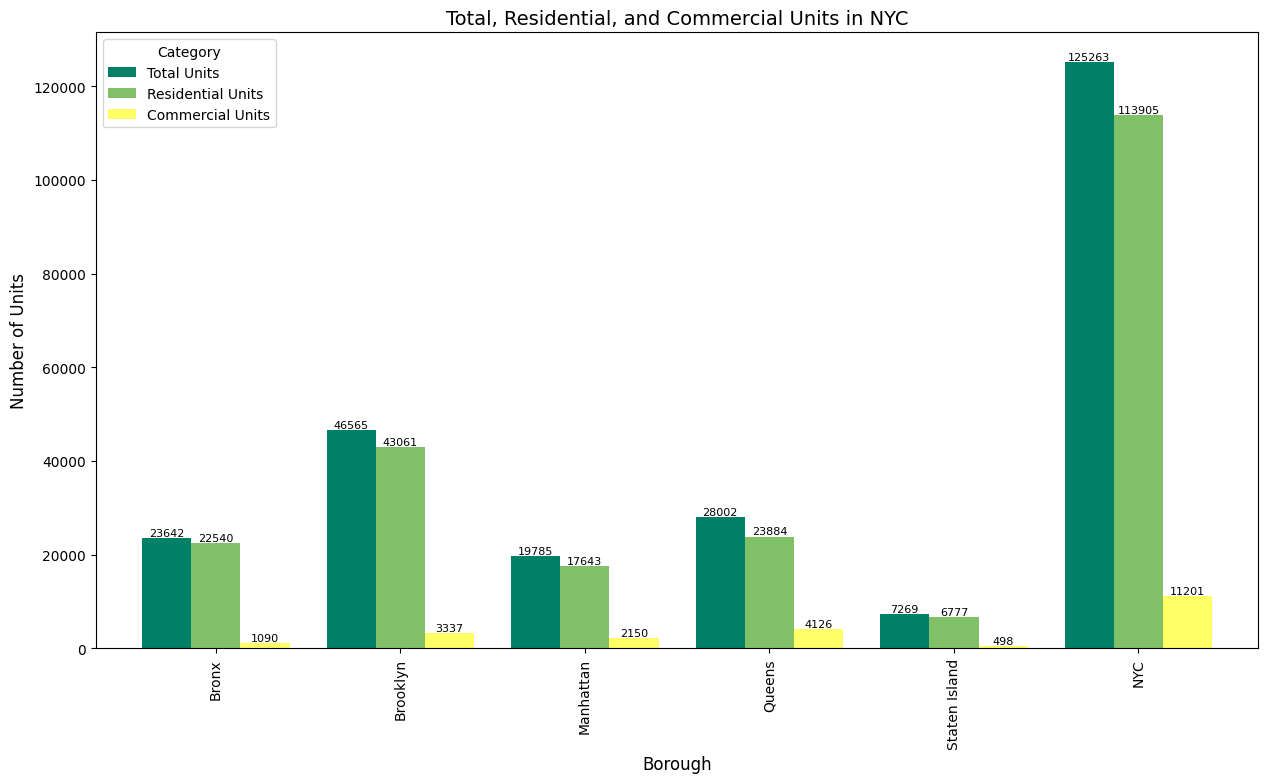

In [27]:
# visualization using bar chart

nyc_units = {
    'Borough': list(total_unit.index) + ['NYC'],
    'Total Units': list(total_unit.values) + [total_unit_nyc],
    'Residential Units': list(residential_units_borough.values) + [total_unit_nyc_residential],
    'Commercial Units': list(commercial_units_borough.values) + [total_unit_nyc_commercial]
}

nyc_df = pd.DataFrame(nyc_units)
ax = nyc_df.set_index('Borough').plot(kind='bar', figsize=(15, 8), colormap='summer', width=0.8)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.title('Total, Residential, and Commercial Units in NYC', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Units', fontsize=12)
plt.legend(title='Category')

plt.show()


**INSIGHT**

---



As can be seen from the chart, in each borough, residential units account for the highest total units compared to commercial units.
The high difference between each bar on the chart clearly illustrates the difference in the number of units.

## Largest Gross Square and Land Square in NYC Visualization

In [28]:
# largest gross square feet in each borough

gross_sq = df.groupby('BOROUGH')['GROSS SQUARE FEET'].max()
gross_sq

,GROSS SQUARE FEET
BOROUGH,
Bronx,1303935.0
Brooklyn,1330743.0
Manhattan,1617206.0
Queens,3750565.0
Staten Island,683200.0


In [29]:
# largest land square feet in each borough

land_sq = df.groupby('BOROUGH')['LAND SQUARE FEET'].max()
land_sq

,LAND SQUARE FEET
BOROUGH,
Bronx,679000.0
Brooklyn,970000.0
Manhattan,189025.0
Queens,4228300.0
Staten Island,3014056.0


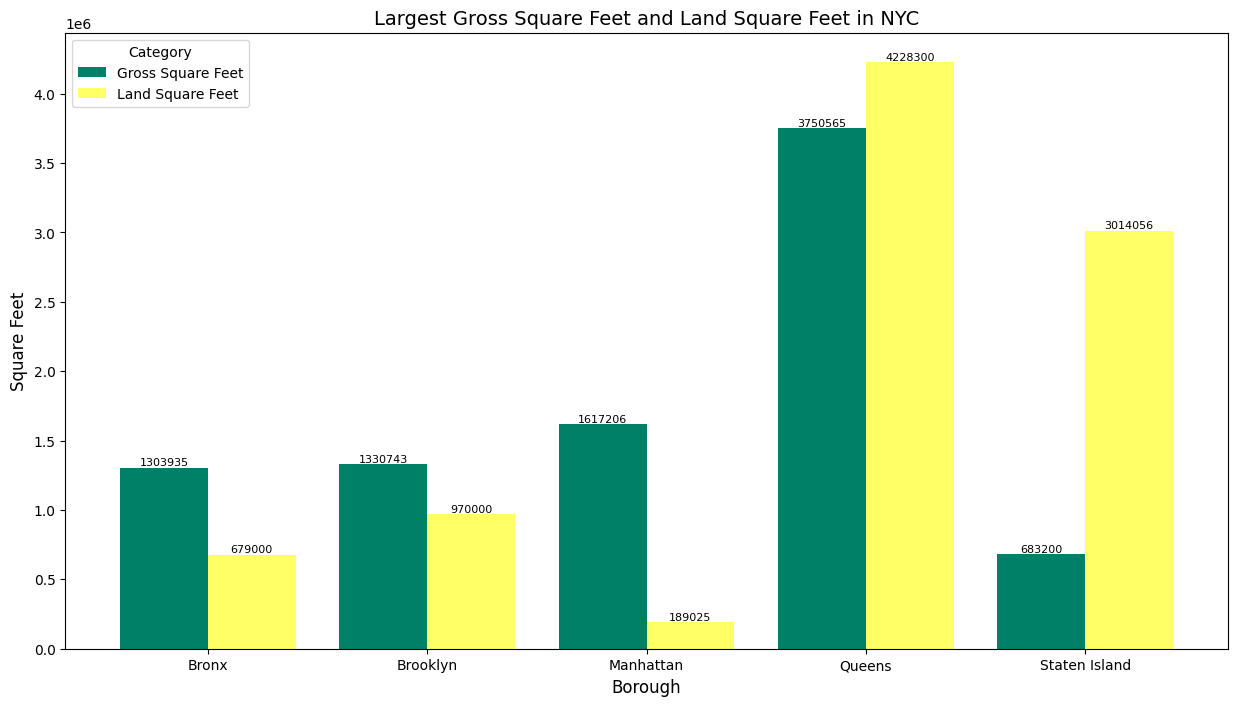

In [30]:
# visualization using bar chart

sq_feet = {
    'Borough': list(land_sq.index),
    'Gross Square Feet': list(gross_sq.values),
    'Land Square Feet': list(land_sq.values)
}

sq_feet = pd.DataFrame(sq_feet)
ax = sq_feet.set_index('Borough').plot(kind='bar', figsize=(15, 8), colormap='summer', width=0.8)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.title('Largest Gross Square Feet and Land Square Feet in NYC', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Square Feet', fontsize=12)
plt.legend(loc='upper left', title='Category')


plt.show()

**INSIGHT**

---



 Of all boroughs in NYC, the borough with the largest Gross Square Feet and Land Square Feet buildings is Queens.

# Sale Price Correlation Analysis

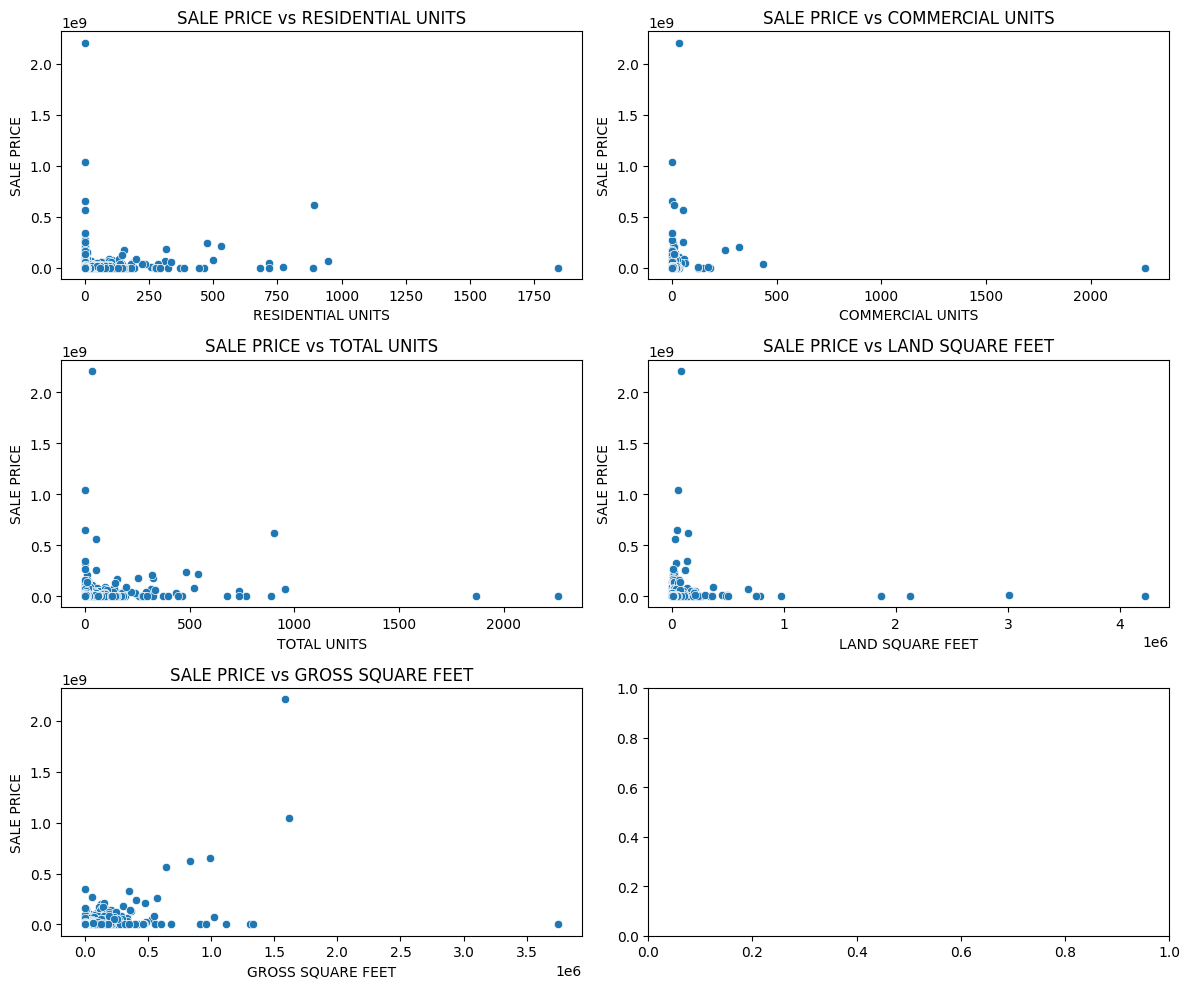

In [37]:
# correlation

fig, axes = plt.subplots(3, 2, figsize=(12,10))
axes = axes.flatten()
columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
           'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for i, col in enumerate(columns):
  sns.scatterplot(x=df[col], y=df['SALE PRICE'], ax=axes[i])
  axes[i].set_title(f"SALE PRICE vs {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("SALE PRICE")

plt.tight_layout()
plt.show()

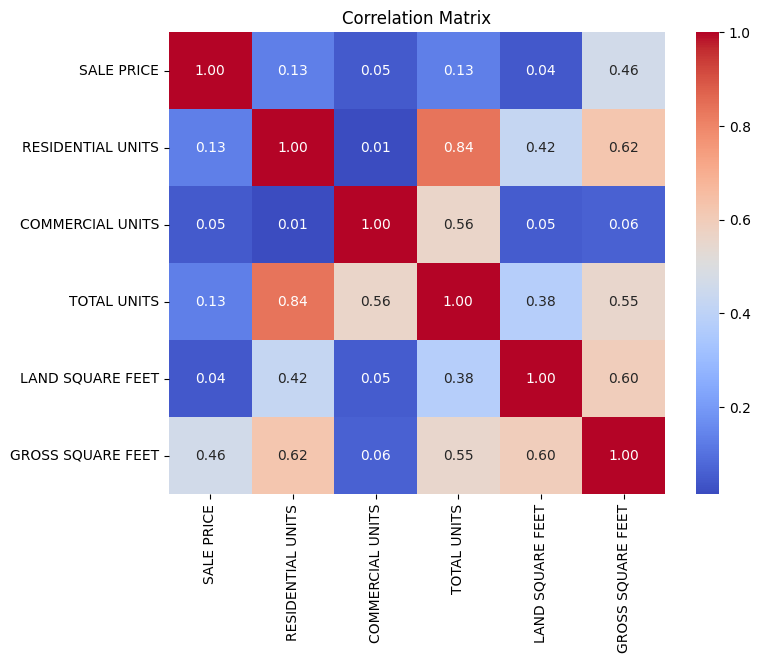

In [42]:
# heat map

df_corr = df[['SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
           'LAND SQUARE FEET', 'GROSS SQUARE FEET']]

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**INSIGHT**

---



The highest correlation between sale price and other variables is shown by gross square feet, which is positive 0.46. This indicates a positive correlation, meaning that when the gross square feet area increases, the sale price will also increase.

On the other hand, land square feet and commercial units show almost no correlation with the sale price.

# CONCLUSION

---



Of all the regions, property in Manhattan is the most expensive property compared to the other boroughs, exceeding the average property price in NYC.

The most common building class category in NYC is family dwelling, where family dwelling occupies the top 3 most building classes in NYC and the most in each borough.

In line with the number of family dwellings building class, the most common tax class type is class 1 which includes most residential properties of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are no more than three stories.

The largest Gross Square Feet and Land Square Feet in all of NYC is in the boroughs of Queens by a significant difference compared to the largest Gross Square Feet and Land Square Feet in other boroughs.

Factors that affect the selling price of the property selling price in NYC are most affected by Gross Square Feet, followed by residential units, and total units. Commercial units and Land Square Feet hardly affect the selling price of the property.
